In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df = pd.read_csv('File/Vietnamese_hallucination_annotated_checked.csv')
df.head()

,title,gemini_text,gemini_sentences,annotation,gemini_text_samples,annotation_note
0,Hà Nội,"Hà Nội, thủ đô của Việt Nam, nằm ở vị trí 21°0...","['Hà Nội, thủ đô của Việt Nam, nằm ở vị trí 21...","['accurate', 'minor_inaccurate', 'accurate', '...","['Hà Nội, thủ đô của Việt Nam, nằm ở tọa độ đị...","[None, 'Hà Nội chỉ nằm trên lưu vực Sông Hồng ..."
1,Thành phố Hồ Chí Minh,Thành phố Hồ Chí Minh (TP.HCM) nằm ở phía Đông...,['Thành phố Hồ Chí Minh (TP.HCM) nằm ở phía Đô...,"['accurate', 'accurate', 'minor_inaccurate', '...",['Thành phố Hồ Chí Minh (TP. HCM) nằm ở phía Đ...,"[None, None, 'Hồ Chí Minh nằm ở hạ lưu sông Sà..."
2,Vịnh Hạ Long,"Vịnh Hạ Long nằm ở phía đông bắc Việt Nam, thu...","['Vịnh Hạ Long nằm ở phía đông bắc Việt Nam, t...","['accurate', 'minor_inaccurate', 'accurate', '...","['Vịnh Hạ Long nằm ở phía đông bắc Việt Nam, t...","[None, '20°54′B 107°12′Đ', None, 'phía Tây và ..."
3,Sapa,"Sa Pa là một thị trấn thuộc tỉnh Lào Cai, Việt...","['Sa Pa là một thị trấn thuộc tỉnh Lào Cai, Vi...","['accurate', 'minor_inaccurate', 'minor_inaccu...","['Sa Pa là một thị trấn thuộc tỉnh Lào Cai, Vi...","[None, '22°20′8″B 103°50′31″Đ', '1.500 m – 1.8..."
4,Đà Nẵng,Đà Nẵng là một thành phố ven biển thuộc miền T...,['Đà Nẵng là một thành phố ven biển thuộc miền...,"['minor_inaccurate', 'minor_inaccurate', 'accu...",['Đà Nẵng là một thành phố trực thuộc trung ươ...,"['16°04′36″B 108°13′22″Đ', '1.284,88 km2, Quản..."


In [52]:
import ast
for col in df.columns[2:]:
    df[col] = df[col].apply(lambda x: ast.literal_eval(x))

In [53]:
df.columns[2:].to_list()

['gemini_sentences', 'annotation', 'gemini_text_samples', 'annotation_note']

In [54]:
# count number of values in each label from annotation
from collections import Counter
label_count = Counter()
for i in df['annotation']:
    label_count.update(i)
total = sum(label_count.values())
print("Total number of sentences: ", total)
for key, value in label_count.items():
    print("- {}: {} ({:.2f}%)".format(key, value, value/total*100))
    

Total number of sentences:  210
- accurate: 131 (62.38%)
- minor_inaccurate: 62 (29.52%)
- major_inaccurate: 17 (8.10%)


In [55]:
map_label = {
    'accurate': 0.0,
    'minor_inaccurate': 0.5,
    'major_inaccurate': 1.0,
}

In [56]:

df['mapped_annotation'] = df['annotation'].apply(lambda x: [map_label[i] for i in x])
df['document_factuatily_score'] = df['mapped_annotation'].apply(lambda x: np.mean(x))
df.head(2)

,title,gemini_text,gemini_sentences,annotation,gemini_text_samples,annotation_note,mapped_annotation,document_factuatily_score
0,Hà Nội,"Hà Nội, thủ đô của Việt Nam, nằm ở vị trí 21°0...","[Hà Nội, thủ đô của Việt Nam, nằm ở vị trí 21°...","[accurate, minor_inaccurate, accurate, minor_i...","[Hà Nội, thủ đô của Việt Nam, nằm ở tọa độ địa...","[None, Hà Nội chỉ nằm trên lưu vực Sông Hồng (...","[0.0, 0.5, 0.0, 0.5, 0.5, 0.0]",0.25
1,Thành phố Hồ Chí Minh,Thành phố Hồ Chí Minh (TP.HCM) nằm ở phía Đông...,[Thành phố Hồ Chí Minh (TP.HCM) nằm ở phía Đôn...,"[accurate, accurate, minor_inaccurate, minor_i...",[Thành phố Hồ Chí Minh (TP. HCM) nằm ở phía Đô...,"[None, None, Hồ Chí Minh nằm ở hạ lưu sông Sài...","[0.0, 0.0, 0.5, 0.5, 0.0]",0.20


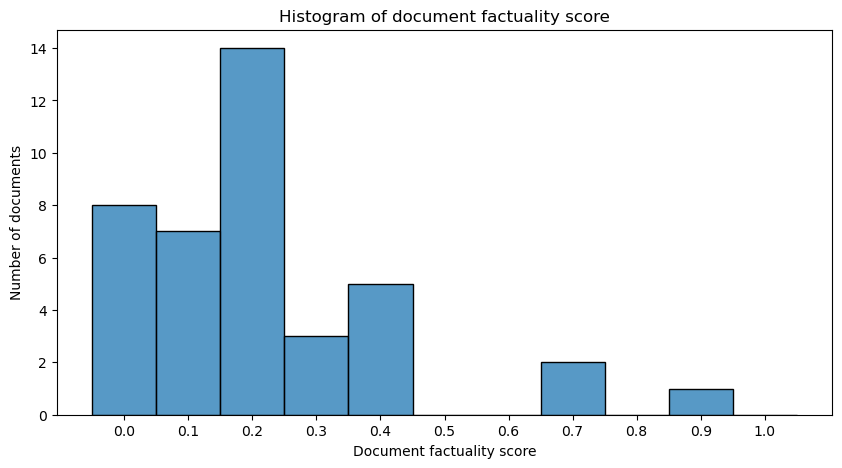

In [57]:
import numpy as np

# Define bin edges to ensure 11 bins from 0.0 to 1.0
bin_edges = np.linspace(-0.05, 1.05, 12)  # 12 points create 11 equal intervals

# Histogram of document factuality score
plt.figure(figsize=(10, 5))
sns.histplot(df['document_factuatily_score'], bins=bin_edges)  # Use bin_edges for equal bin widths
plt.title('Histogram of document factuality score')
plt.xticks(np.arange(0.0, 1.1, 0.1))  # Ensure labels from 0.0 to 1.0
plt.xlabel('Document factuality score')
plt.ylabel('Number of documents')
plt.show()
